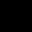

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32,32,3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

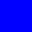

In [2]:
data[:,:] = [0,0,255]
image = Image.fromarray(data, 'RGB')
image

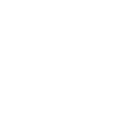

In [3]:
data = np.zeros([128,128,3], dtype=np.uint8)
data[:,:] = [255,255,255]
image = Image.fromarray(data, 'RGB')
image

In [4]:
from PIL import Image
import os

image_path = "data/pillow_practice.png"

image = Image.open(image_path)

print(image.width)
print(image.height)

jpg_image_path = image_path = "data/pillow_pra"

620
465


In [5]:
import os
import pickle
from PIL import Image

dir_path = "data/cifar-100-python"
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
# print(train)

<class 'dict'>


In [6]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [7]:
type(train[b'filenames'])


list

In [8]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [9]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

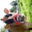

In [10]:
image_data = train[b'data'][0].reshape([32,32,3], order = 'F')
image = Image.fromarray(image_data)
image

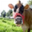

In [11]:
image_data = np.swapaxes(image_data, 0, 1)
image = Image.fromarray(image_data)
image

In [12]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = "data/cifar-100-python"
train_file_path = os.path.join(dir_path, 'train')

image_dir_path = "data/cifar-images"
if not os.path.exists(image_dir_path):
    os.mkdir(image_dir_path)
    
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        image_data = train[b'data'][i].reshape([32,32,3], order = 'F')
        image_data = np.swapaxes(image_data, 0, 1)
        image = Image.fromarray(image_data)
        image.save(os.path.join(image_dir_path, filename))

100%|██████████| 50000/50000 [00:33<00:00, 1489.02it/s]


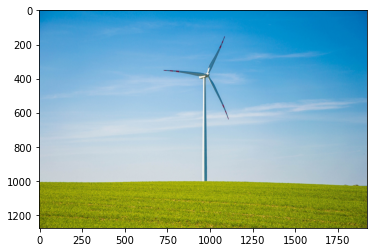

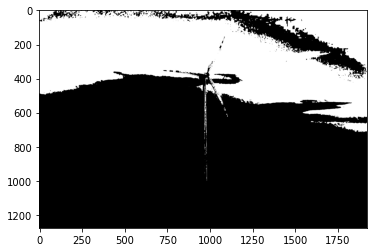

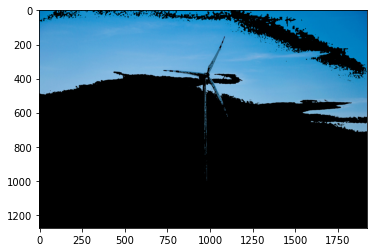

In [13]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img_path = "data/cv_practice.jpg"
image = cv.imread(img_path)

# BGR -> HSV로 변환
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# HSV에서 파란색 범위 정의
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# HSV 이미지 임계값으로 설정 파란색만 추출
mask = cv.inRange(hsv, lower_blue, upper_blue)

# bitwise_and 사용
res = cv.bitwise_and(image, image, mask=mask)

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

In [14]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

dir_path = "data"
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [15]:
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    f = plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([cv_image], [i], None, [256], [0,256])
        im2.plot(histr, color = col)
    im2.set_title("Histogram")

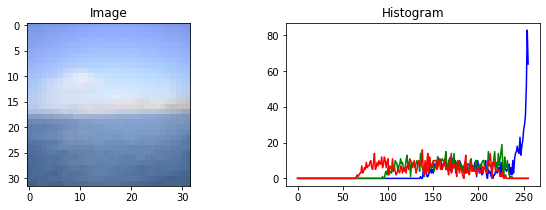

In [16]:
draw_color_histogram_from_image('adriatic_s_001807.png')

In [17]:
def get_histogram(image):
    histogram = []

    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[4], ranges=[0, 256])
        histogram.append(channel_histogram)
    
    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [18]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [19]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)
        histogram = get_histogram(image)
        histogram_db[file_name] = histogram
        
    return histogram_db

In [20]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [02:52<00:00, 289.26it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [24]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [28]:
target_histogram = get_target_histogram()
target_histogram

array([[0.2506302 ],
       [0.35941437],
       [0.28902462],
       [0.19303858],
       [0.12904789],
       [0.32741904],
       [0.37434554],
       [0.26129532],
       [0.08212139],
       [0.31035486],
       [0.4095404 ],
       [0.29009113]], dtype=float32)

In [29]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram, H2=histogram, method=cv2.HISTCMP_CHISQR)
        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results


In [30]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 539057.11it/s]


{'panthera_tigris_s_000870.png': 0.0,
 'toddy_palm_s_000106.png': 0.01588606835189593,
 'whiskey_bottle_s_000520.png': 0.022954596039152536,
 'otter_s_000968.png': 0.024904000540551995,
 'possum_s_000042.png': 0.025951669377415443}

In [31]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1, len(result), idx+1)
        img = Image.open(img_path)
        im.imshow(img)
        

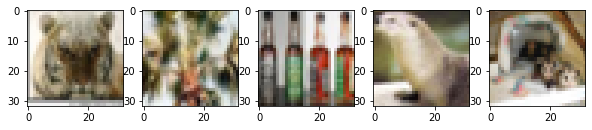

In [32]:
show_result(result)

100%|██████████| 49999/49999 [00:00<00:00, 634843.43it/s]


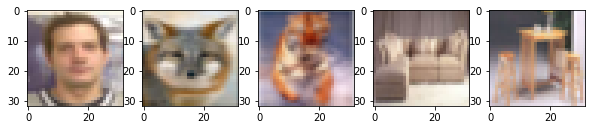

In [33]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)